## Today we will use the sklearn KNeighborsClassifier

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns; sns.set()  # for plot styling

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

knn = KNeighborsClassifier(algorithm='auto', 
                           leaf_size=30, 
                           metric='minkowski',
                           metric_params=None, 
                           n_jobs=1, 
                           n_neighbors=5, 
                           p=2,
                           weights='uniform')

## Data

In [9]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
y = iris.target

In [10]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

print('Accuracy=', round(accuracy_score(pred,y_test),2))

Accuracy= 0.76


In [12]:
# scale the features using StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_sc,y_train)
pred = clf.predict(X_test_sc)

print('Accuracy=', round(accuracy_score(pred,y_test),2))

Accuracy= 0.84


## Finding the opimal k

Best accuracy:  0.84 at k = 27


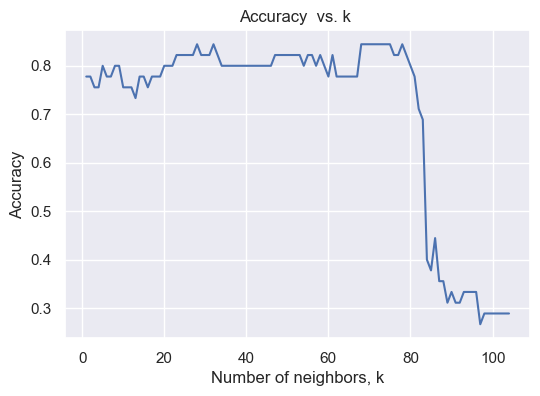

In [13]:
accuracy = []

for i in range(1,len(X_train)):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    pred_i = clf.predict(X_test)
    accuracy.append(accuracy_score(pred_i,y_test))

plt.figure(figsize=(6,4))
plt.plot(range(1,len(X_train)),accuracy,'b-')
plt.title('Accuracy  vs. k ')
plt.xlabel('Number of neighbors, k')
plt.ylabel('Accuracy')

best_index = np.argmax(accuracy)

print("Best accuracy: ",round(max(accuracy),2),"at k =",best_index)

## Plotting the decision boundry

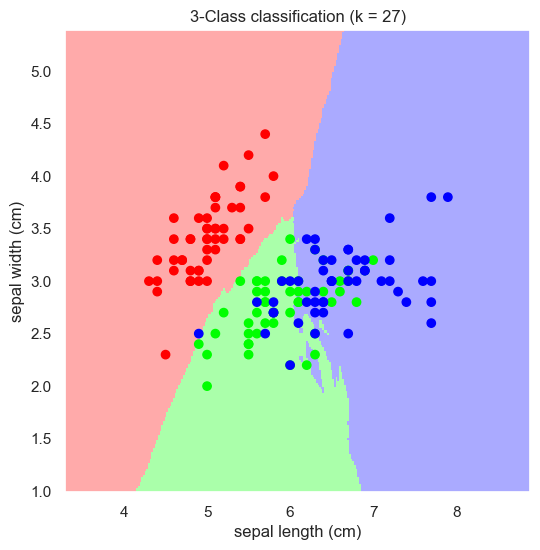

In [14]:
n_neighbors = best_index

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    
clf = KNeighborsClassifier(n_neighbors) 
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
    
plt.figure(figsize = (6, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
#plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

plt.show()

## Comparison the results for different k

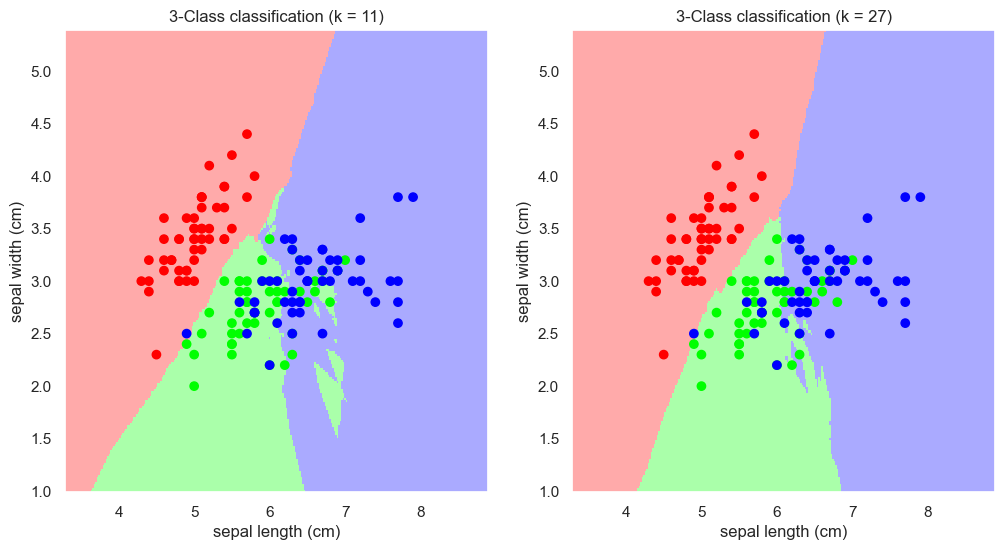

In [15]:
n_neighbors = 5

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(12, 6))
n=1

for n_neighbors in [11,best_index]:
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors) 
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    plt.subplot(1,2,n)
    
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"% (n_neighbors))
    #plt.legend()
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.axis('tight')
    n+=1

plt.show()

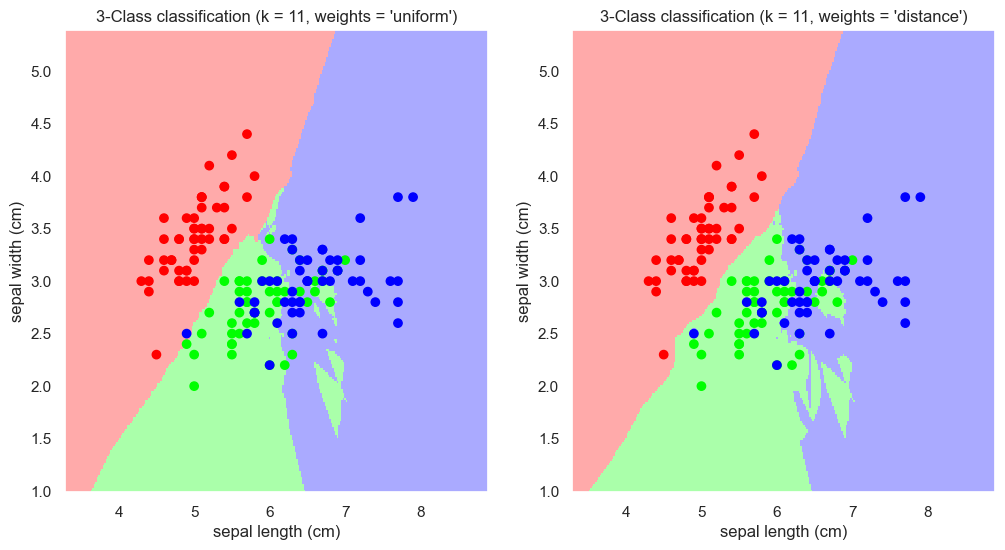

In [16]:
n_neighbors = 11

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(12, 6))
n=1

for weights in ['uniform', 'distance']:
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights) 
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
 
    plt.subplot(1,2,n)
    
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    #plt.legend()
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.axis('tight')
    n+=1

plt.show()

## Home Excersice
 - Apply KNN algorithm on the following data: two crescents with some gaussian noise.
 - Check the influence of k-value on your results. Plot the decision boundries for 4 different k values.
 - Check the influence of p-value (1,2) on your results. Plot the the decision boundries for different p values.
 - Check the influence of the noise parameter (for the data).

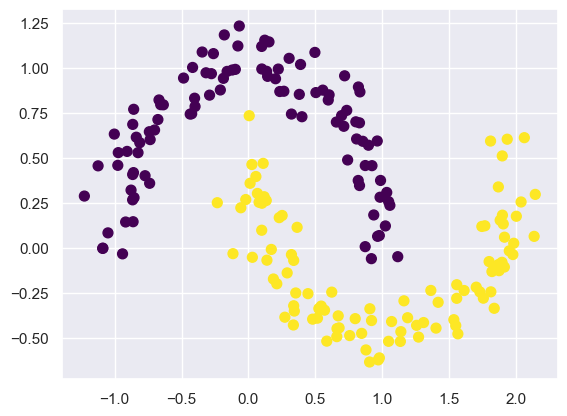

In [17]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.1, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y,s=50, cmap='viridis');

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
clf1 = KNeighborsClassifier(n_neighbors=3)
clf1.fit(X_train,y_train)
pred = clf1.predict(X_test)

print('Accuracy=', round(accuracy_score(pred,y_test),2))

Accuracy= 0.98


Best accuracy:  0.98 at k = 1


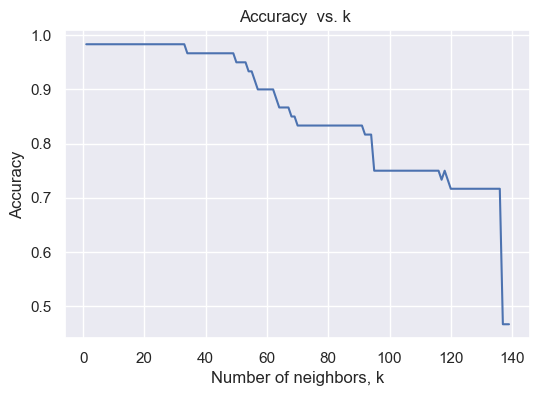

In [20]:
accuracy = []

for i in range(1,len(X_train)):
    clf1 = KNeighborsClassifier(n_neighbors=i)
    clf1.fit(X_train,y_train)
    pred_i = clf1.predict(X_test)
    accuracy.append(accuracy_score(pred_i,y_test))

plt.figure(figsize=(6,4))
plt.plot(range(1,len(X_train)),accuracy,'b-')
plt.title('Accuracy  vs. k ')
plt.xlabel('Number of neighbors, k')
plt.ylabel('Accuracy')
best_index = np.argmax(accuracy)+1

print("Best accuracy: ",round(max(accuracy),2),"at k =",best_index)

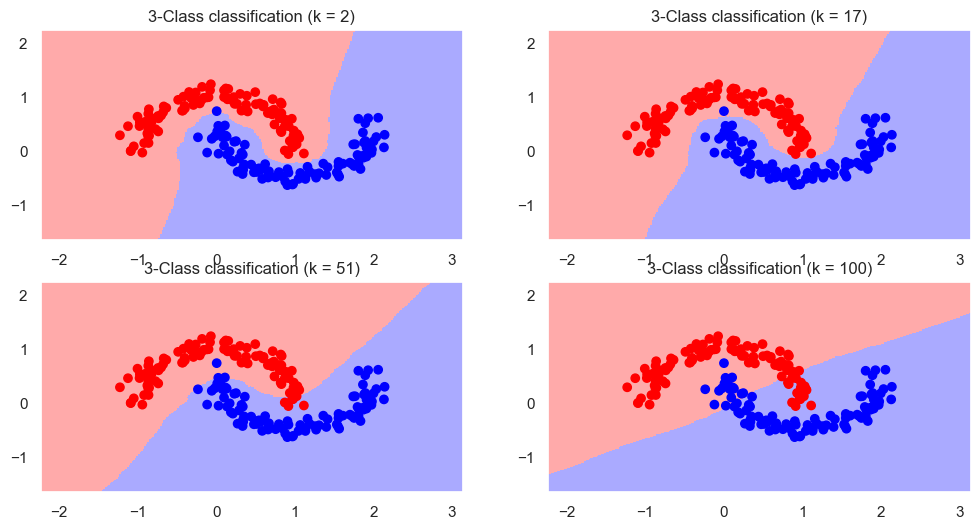

In [21]:
n_neighbors = best_index

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(12, 6))
n=1

for n_neighbors in [2, 17, 51, 100]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors) 
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.subplot(2,2,n)
    
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"% (n_neighbors))
    #plt.legend()
    plt.axis('tight')
    n+=1

plt.show()

Best accuracy:  0.98 at k = 1


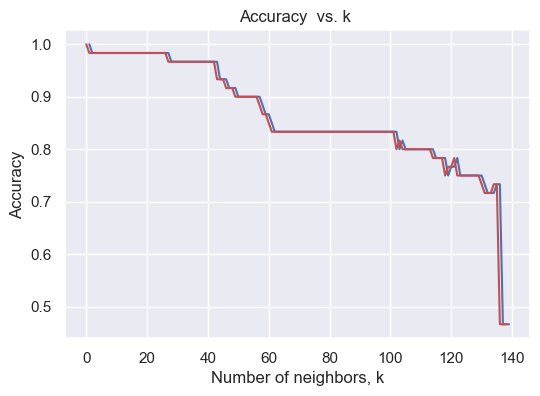

In [22]:
accuracy_p1 = []
accuracy_p2 = []
for i in range(1,len(X_train)):
    clf1 = KNeighborsClassifier(n_neighbors=i, p=1)
    clf1.fit(X_train,y_train)
    pred_i = clf1.predict(X_test)
    accuracy_p1.append(accuracy_score(pred_i,y_test))
    clf1 = KNeighborsClassifier(n_neighbors=i, p=1)
    clf1.fit(X_train,y_train)
    pred_i = clf1.predict(X_test)
    accuracy_p2.append(accuracy_score(pred_i,y_test))

plt.figure(figsize=(6,4))
plt.plot(range(1,len(X_train)),accuracy_p1,'b-', accuracy_p2, 'r-')
plt.title('Accuracy  vs. k ')
plt.xlabel('Number of neighbors, k')
plt.ylabel('Accuracy')
best_index = np.argmax(accuracy)+1

print("Best accuracy: ",round(max(accuracy),2),"at k =",best_index)

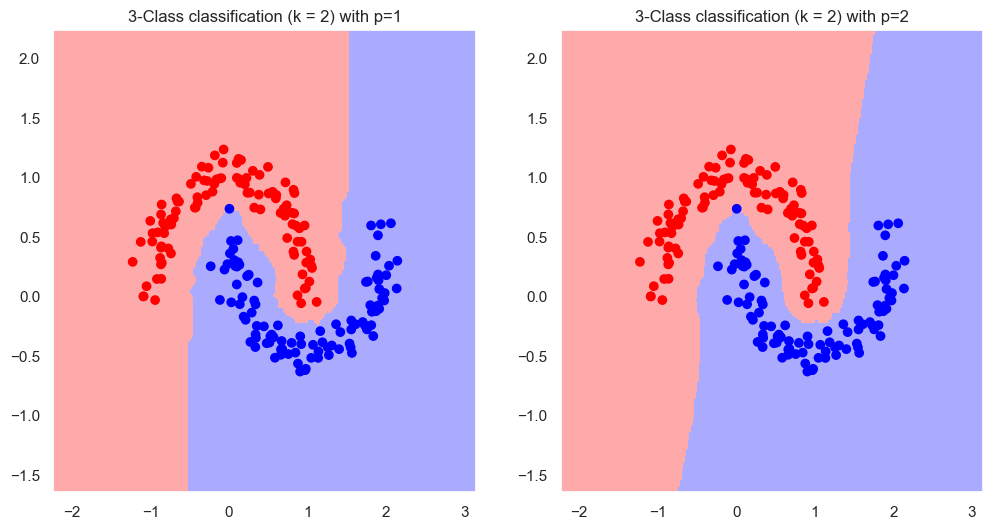

In [23]:
n_neighbors = 2

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(12, 6))
n=1

for p in [1, 2]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, p=p) 
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.subplot(1,2,n)
    
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = 2) with p=%i"% (p))
    #plt.legend()
    plt.axis('tight')
    n+=1

plt.show()

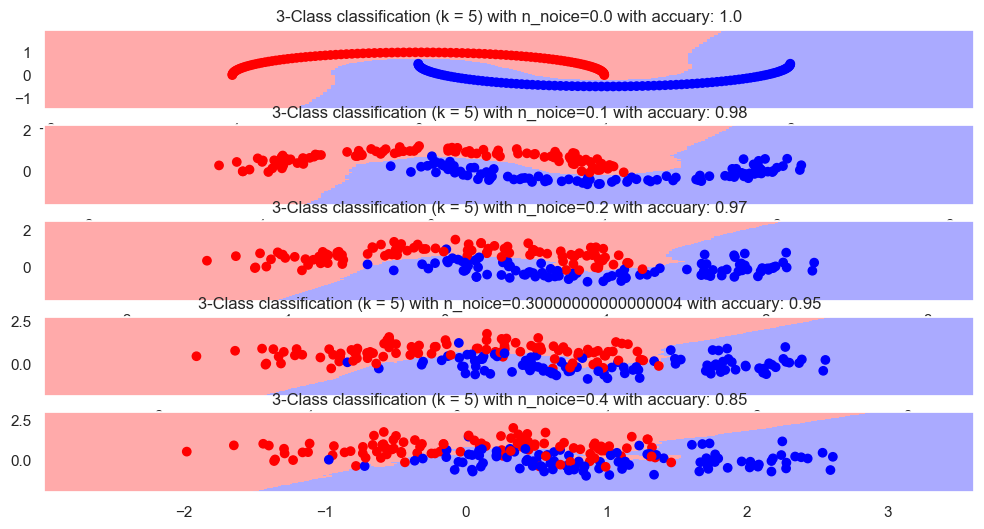

In [24]:
n_neighbors = 5

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(12, 6))
n=1

for n_noice in np.arange(0, 0.5, 0.1):
    X, y = make_moons(200, noise=n_noice, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors) 
    clf.fit(X, y)
    pred = clf.predict(X_test)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.subplot(5,1,n)
    
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class classification (k = {n_neighbors}) with n_noice={n_noice} with accuary: {round(accuracy_score(pred,y_test),2)}")
    #plt.legend()
    plt.axis('tight')
    n+=1

plt.show()

## Diffrent Data with MLP

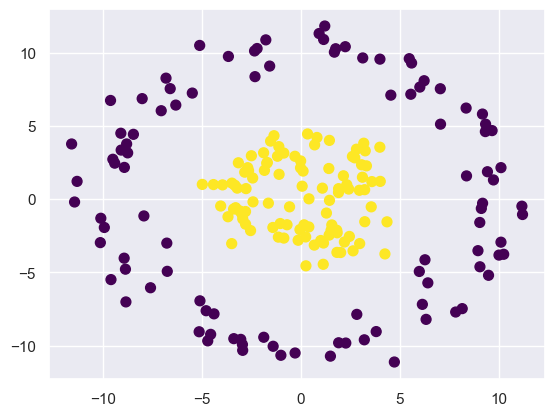

In [40]:
from sklearn.datasets import make_circles

X, y = make_circles(200, factor=0.3, noise=.1, random_state=42)
X = 10 * X
plt.scatter(X[:, 0], X[:, 1], c=y,s=50, cmap='viridis');

In [50]:
from sklearn.neural_network import MLPClassifier
mclf = MLPClassifier(hidden_layer_sizes=(5, 14), activation='tanh', solver='sgd', 
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.005, 
                    power_t=0.5, max_iter=500, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=0, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
mclf.fit(X_train, y_train)
print('Accuracy=', round(accuracy_score(pred,y_test),2))

Accuracy= 0.85


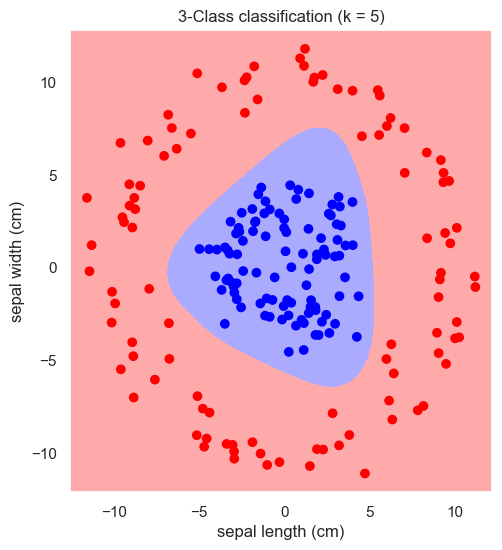

In [51]:
n_neighbors = 5

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(12, 6))
n=1

mclf = MLPClassifier(hidden_layer_sizes=(5, 14), activation='tanh', solver='sgd', 
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.005, 
                    power_t=0.5, max_iter=500, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=0, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
mclf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = mclf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.subplot(1,2,n)

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"% (n_neighbors))
#plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
n+=1

plt.show()